# Chapter 01: Exploratory Data Analysis Part I

```{contents} Table of Contents
:depth: 3
```

In [210]:
from IPython.display import display, HTML

display(HTML("""
<style>
.callout { padding:12px 14px; border-radius:10px; margin:10px 0; }
.callout.note { background:#eff6ff; border-left:6px solid #3b82f6; }
.callout.warn { background:#fff7ed; border-left:6px solid #f97316; }
.callout.good { background:#ecfdf5; border-left:6px solid #10b981; }
.callout.bad  { background:#fef2f2; border-left:6px solid #ef4444; }
</style>
"""))


display(HTML("""
<style>
/* Base callout */
.callout {
  padding: 12px 14px;
  border-radius: 10px;
  margin: 12px 0;
  line-height: 1.35;
  border-left: 6px solid;
  box-shadow: 0 1px 2px rgba(0,0,0,0.06);
}

/* NOTE variant */
.callout.note {
  background: #eff6ff;         /* light blue */
  border-left-color: #3b82f6;   /* blue */
}

/* Optional: title line inside */
.callout .title {
  font-weight: 700;
  margin-bottom: 6px;
}
</style>
"""))

## Exploratory vs Confirmatory data analysis 
Exploratory data analysis (**EDA**) is the study of: the potential for data to answer hypotheses and how to generate novel hypotheses by the study of relationships between collected information.
This is in contrast to confirmatory data analysis. 
Confirmatory data analysis techniques are hypothesis tests, confidence intervals, statistical estimators---methods by which we seek to understand all possible experiments by observing a smaller number of experiments. 

Both analyses are important. We will start with EDA. 

---

## Experiments, Outcomes, Datapoints, and Dataframes

We define a **set** as a collection of items, sometimes called elements. A set is typically given a capital letter (for example $A$) and the elements are included inside curly braces.

We use $\mathcal{G}$ to define the set of all possible outcomes from an experiment and call this set the **sample space**.
The term *"experiment"* has a broad meaning.
An experiment can mean everything from a randomized controlled trial to an observational study.
Experiments are what produce observations that we collect and try to characterize.
Here an **experiment** is the process that generates outcomes.

An **outcome** is defined as an element of the sample space, some result of the experiment that is recorded.
An outcome is a single observation from an experiment, and we define an **event** as a set, or group, of outcomes.
Most often we use $o_{i}$ to denote an outcome and $E_{i}$ to denote an event.

The sample space, event, and outcome are all potential results from an experiment.
When we conduct an experiment we will generate an outcome from our sample space and call this realized outcome a **data point**.

---
  
<div class="callout note">
<b> Example: Flipping a coin </b>

Consider the experiment of flipping a coin and recording whether the coin lands heads or tails side up.  
We can define a sample space $\mathcal{G} = \{H,T\}$ where $H$ is an outcome that represents the coin landing heads up and $T$ represents tails up. 
The sample space includes all the possible events we wish to record, either the coin lands heads or it lands tails.  

Up until this point we have structured our experiment, but we have not generated data.
We flip the coin and the coin lands tails side up. Now we have performed an experiment and generated the data point $T$.
We flip again and record a heads. $H$ is the second data point, and so on. 
</div>

<div class="callout note">
<b> Example: Crowd accidents </b>
<p>
A dataset of crowd accidents---defined as situations where mass gatherings of people lead to deaths or injuries---was collected by authors. The publication is linked here = <a>https://www.sciencedirect.com/science/article/pii/S0925753523001169?via%3Dihub</a>
</p>
    
<p>Researchers collected from each accident:</p>
<ul>
  <li>date</li>
  <li>location (lat/long)</li>
  <li>purpose</li>
  <li>crowd size</li>
  <li>injuries</li>
  <li>fatalities</li>
</ul>
</p>

<p>
Here, the experiment is passive and could be considered observing a crowd accident.
We may choose to single out the number of injuries from each crowd accident as our outcome of interest.
Then $\mathcal{G} = \{ 0,1,2,3,\cdots \} = \mathbb{N}$. In other words, the sample space is the set of all integers from 0 onwards. 
</p>

</div>

<div class="callout note">
<b> Example: Framingham Heart Study </b>
    
The Framingham Heart Study (FHS) began in 19XX with the goal of identifying risk factors for heart disease. Researchers consent particpants and then follow them for years. 
They collect general health information about the patients, results from meical examinations, and, in more recent studies, even collect genetic information. More infromation about this study can be found here <a>https://www.framinghamheartstudy.org/fhs-for-researchers/data-available-overview/</a>.   

<p>
An experiment in the FHS could be defined as the longitudinal followup of a single patient. 
This experiment would generate information about the patient at several time points over the period in which they are observed.

We might decide to focus on cholesterol levels <u> and </u> whether the patient experienced a myocardial infarction (i.e. heart attack) over the course of their time in the study. 
In this case, an observation could be considered the ordered pair $(c,h)$ where $c$ is the patient's cholesterol level and $h$ equal the value one if the patient experienced a myocardial infarction and zero otherwise. The sample space $\mathcal{G}$ is then the set of all possible combinations of cholesterol and heart attack values.
    
</p>

</div>

<div class="callout note">
<b> Example: DAN-RSV </b>

The DAN-RSV clinical trial randomized 131k patients who were 60 or older to either recieve a RSVpreF vaccine or recieve no vaccine (called the control group). Patients were oberved and researchers recorded: patient demographic data as well as hospitalization or death due to RSV. 

Here, the experiment is randomizing a patient to recieve or not receive the treatment (in this case the RSV vaccine). This is different than the previous two examples. The research team is actively intervening upon a population. In the past two examples, the research was more passively observing an experiment. An observation here could be considered the clincial information recorded from a single patient at the end of theor followup period. 

</div>


---

### Data set and data frame
Now suppose that we conduct an experiment with the same sample space $(\mathcal{G})$ a number $N$ times and with each experiment we record a data point.
A tuple (i.e. ordered list) of data points $d$ is called a **data set** $\mathcal{D} = (d_{1}, d_{2}, d_{3}, \cdots, d_{N})$ where $d_{i}$ is the data point generated from the $i^\text{th}$ experiment.
We say that we have _drawn_ or that we have _sampled_ a data set $\mathcal{D}$.
Further, data points $(d)$ are often called _realized_ outcomes because they are no longer in a set of potential possibilities but are now determined items.

A data set $\mathcal{D}$ can be unwieldy depending on the number of data points, the complexity of the sample space, or both.
A **data frame** is one way to organize a data set.
A data frame $\mathcal{F}$ is a table where each data point $d$ in a dataset $\mathcal{D}$ is represented as a row in the table.
Each data point may contains multiple pieces of information.
That is, each data point may itself be a tuple. 
In this case, then a separate column is created for each position in the tuple.

---

<div class="callout note">
<b> Example Human predictions of infectious diseases:</b>
    
Suppose we design an experiment to collect from humans predictions, two weeks ahead from the time of our experiment, of the number of incident cases and incident deaths at the US national level of COVID-19 ([Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7523166/)).
We decide to collect from each human whether they are an expert in the modeling of infectious disease, a prediction of incident cases, and a prediction of incident deaths.
We draw a data set $\mathcal{D}$ of 50 human judgment predictions.
We can organize this data set into a data frame:

| Expert | Prediction of cases | Prediction of deaths |
|--------|---------------------|----------------------|
| Yes    | 145                 | 52                  |
| No     | 215                 | 34                  |
| Yes    | 524                 | 48                  |
| Yes    | 265                 | 95                  |
| No     | 354                 | 35                  |

**Table:** Example data frame $\mathcal{F}$ built from a data set $\mathcal{D}$ that contains 5 data points where each data point is a tuple of length three.

---

Above, the first data point is $(\text{Yes},145,52)$, the second data point is $(\text{No}, 215, 34)$, and so on until the last data point $(\text{No}, 354, 35)$.
A data frame can also include informative information for others such as labels for each column.


## Data Types
Observations can be classified into: names, grades, ranks, fractions and percentages, counts, amounts, and balances.  
This classification system is called the *Mosteller-Tukey* classification system.
There exist other systems and *Stevens Typology*---classifying data as nominal, ordinal, interval, and ratio---is another popular choice. 

## Amounts and Counts:
Both amounts and counts are non-negative values without a necessary upper bound. 
Amounts are real-valued and counts are integers.

<div class="callout note">
    <b>Example:</b> In the crowd accident study, the number of injuries are classified as counts. 
</div>

## Balances:
Balances are observations that can be positive or negative real values. 

<div class="callout note">
    <b>Example:</b> In the FHS, cholesterol levels are recorded for patients.
    We may consider a patient's cholesterol level minus a "healthy" level. 
    If the patient's cholesterol is smaller than health then this value is negative.
    Otherwise it is positive. This is a "balance". 
</div>

## Counted Fractions and Percentages:
Counted fractions are values $x/y$ where $x$ and $y$ are integers and $x \leq y$.
Percentages are any real value between 0 and 100.
Importantly, both counted fractions and percentages are bounded. 
Fractions are bounded between 0 and 1, and percentages between 0 and 100.

<div class="callout note">
<b>Example:</b> In the DAN-RSV study they recorded the number of patients enrolled in each arm of the trial as well as the number of patients who died due to RSV over the observational period. The number of deaths divided by the number of enrolled patients is a counted fraction. 
</div>

## Grades, Ranks, and Names
In the *Mosteller-Tukey* classification system there also exist: Names, Grades, and Ranks. 
We are less likely to use these data classifications in this course, but they should still be briefly discussed. 

Data that can be 'Graded' can be assigned one of set of levels.
These levels are sorted such that when you compare two graded observations you can say that one observation is 'higher' or 'larger' than the other. 
A set of $N$ observations can be ranked if each observation can be assigned an integer from 1 to N such that an observation with rank $x$ is larger than an observation with rank $y$ is $x>y$. 
Named data cannot be compared to one another.

## Descriptive Statistics 

The goal of descriptive statistics are to characterize a set of observations, or pairs of observations with a smaller set of numbers. 

Consider storing the each observation from a set of experiments as a component of a vector.
\begin{align}
    v = [ v_{1},v_{2},\cdots,v_{N}]^{T}
\end{align}

Then a descriptive statistic is a function from $v$ to $\mathcal{R}$ that "best" describes some attributre of this vector. 
Though there is a loss of information by describing a set of $N$ observations by a smaller $n<N$ set of numbers, descriptive statistics can help us quickly understand our the data that we have collected and what we can do with this data. 

<div class="callout note">
<b>The mean:</b>
Define the mean as 
\begin{align}
    \bar{v} = \sum_{i=1}^{N} v_{i} / N = v'\mathbb{1}/N
\end{align}

where $\mathbb{1}$ is defined as a vector of $N$ ones and $x'y$ is called the inner product and defined as $x'y = \sum_{i} x_{i} y_{i}$.
The mean maps a vector of $N$ values into a single value that is meant to best represent the most common value in the vector. More on this below. 
</div>

Other common descriptive statistics are the mean, median, standard deviation etc. 

### Measures of Central Tendancy 

A measure of central tendency aims to use a single value to describe where observations are most probable.

<div class="callout note">
For <u>counted data</u>, a natural measure of central tendency is the **mode**.
Given a dataset of $n$ observations, $\mathcal{D} = (d_{1}, d_{2}, \cdots, c_{n})$, enumerate all unique values in $\mathcal{D}$ and labels them as $v_{1}, v_{2}, \cdots, v_{u}$.
In addition, assign the number of times each $v_{i}$ was observed and label these frequencies as $f_{1}, f_{2}, \cdots, f_{u}$.
The mode is defined as the value $v$ that corresponds to the highest frequency. 
</div>

---

In [175]:
#--Import pandas. This will allow us to download the dataset from the internet. 
#--More on pandas in the following lectures.
import pandas as pd 
d = pd.read_csv("https://zenodo.org/records/7523480/files/accident_data_numeric.csv?download=1")
d.head()

,Number,Full date,Day,Month,Year,Country,Latitude,Longitude,Purpose of gathering,Fatalities,Injured,Crowd size,References
0,1,"September 19, 1902",19,9,1902,USA,33.513000,-86.894000,Religious,115,80,2000,19020919.txt
1,2,"January 11, 1908",11,1,1908,United Kingdom,53.554000,-1.479000,Entertainment,16,40,0,19080111.txt
2,3,"December 24, 1913",24,12,1913,USA,47.248400,-88.455300,Entertainment,73,0,0,19131224.txt
3,4,"February 4, 1914",4,2,1914,United Kingdom,53.411389,-1.500556,Sport,0,75,43000,19140204.txt
4,5,"December 31, 1929",31,12,1929,United Kingdom,55.846000,-4.423000,Entertainment,71,0,600,19291231.txt


In [176]:
#--the dataset is called d. 
#--The number of fatalities for each crowd incident is stored in a list called d["Fatalities"]

#--Scipy has a function called mode that will compute the mode for us. 
from scipy.stats import mode
unique_value, f = mode(d["Fatalities"])

#--Print the output
print(f"The most frequent number of fatalities during a crowd accident is {unique_value}, and this number of fatalities was observed {f} times.")


The most frequent number of fatalities during a crowd accident is 0, and this number of fatalities was observed 24 times.


For <u>Amount and Balance data</u>, there are several additional measures of central tendency that may be useful.
Given a dataset of $n$ observations, $\mathcal{D} = (d_{1}, d_{2}, \cdots, d_{n})$, the <b>mean</b> is a value such that the majority of observations are "close" to this value. 

<div class="callout note">
As we saw above, the <b>mean</b> is computed as 

\begin{align}
    \bar{x} = \sum_{i=1}^{N} d_{i} / N = d'\mathbb{1}/N
\end{align}

where $d = [d_{1}, d_{2}, \cdots, d_{n}]^{'}$

There are two intuitive explanations of the mean.

<b> The mean as most often</b>
The first explanation suggests that the mean takes into account the frequency of each observation in the dataset. 

Consider the following dataset:
\begin{align}
    \mathcal{D} = (1,2,3,5,3,2,1,7,4,1,7,7,1,2)
\end{align}

using the above formula for the mean, we would compute

\begin{align}
    \bar{x}  = \frac{1+2+3+5+3+2+1+7+4+1+7+7+1+2}{14}
\end{align}

however addition is commutative. We would arrive at the same mean if we moved all the same values next to another.

\begin{align}
    \bar{x} &= \frac{1+1+1+1 + 2+2+2 + 3+3 + 4 + 5 + 7 + 7 + 7}{14}
\end{align}

We can rewrite the above sum as the frequency that each number appears times its value or 
\begin{align}
    \bar{x}  &= \frac{ 4 \cdot 1 + 3 \cdot 2 + 2 \cdot 3 + 1 \cdot 4 + 1 \cdot 5 + 3 \cdot 7 }{14}
\end{align}
and finally we can distribute the denominator
\begin{align}
          \bar{x}   &= \frac{4}{14} 1 + \frac{3}{14} 2 + \frac{2}{14} 3 + \frac{1}{14} 4 + \frac{1}{14} 5 + \frac{3}{14} 7 \\
\end{align}

We see that the mean weights each observation by the proportion of times that it appears in the dataset. 

<b> The mean as middle</b>
The second intuitive explanation is that the mean is the "middle" value. 
Consider the dataset containing two observations, 
\begin{align}
    \mathcal{D} = (1,7),
\end{align}
then a natural "middle" value would be half way between 1 and 7 or $ 1 + (7-1)/2 = 4$.

---

*Example: Crowd accidents continued*
Rather than consider the number of fatalities counted data, we could consider this an amount. 
In that case, we could compute the average number of fatalities over all crowd accidents that occured from 1975-1980, 1981-1985, in five year increments until 2015-2019.
The authors [in this publication](https://www.sciencedirect.com/science/article/pii/S0925753523001169?via%3Dihub)
ran this exploratory data analysis. 

In [177]:
import pandas as pd 
d = pd.read_csv("https://zenodo.org/records/7523480/files/accident_data_numeric.csv?download=1")

import numpy as np #--The numpy package (often abbreviated np) has a function to compute the mean. 
mean_fatalities = np.mean(d["Fatalities"])                     #--this is how to compute the mean

print("The average number of fatalties among all crowd accidents is below")
print(mean_fatalities)

The average number of fatalties among all crowd accidents is below
49.07829181494662


**Note** an important point about the mean, the mean does not need to be one of the values in the dataset. 
In this case, we see that the mean is the decimal value 49.08 (not a counted value). 


Another useful measure of central tendency for amount and balance data is the **median**. 
Given a dataset $\mathcal{D}$, the median is the value $v$ such that half of the observations are smaller than $v$ and half of the values are larger than $v$.

<div class="callout note">
<b> Example: Computing and comparing the median to the mean </b>
    
Consider the crowd accident dataset $\mathcal{D}$ above. 
We can compute the median number of fatalities by sorting the values from lowest to highest, finding the middle most value, and extracting that value.
It is often easier to use a function in numpy like this. 
</div>

In [178]:
import pandas as pd 
d = pd.read_csv("https://zenodo.org/records/7523480/files/accident_data_numeric.csv?download=1")

import numpy as np #--The numpy package (often abbreviated np) has a function to compute the mean. 
median_fatalities = np.median(d["Fatalities"])                     #--this is how to compute the mean

print("The median number of fatalties among all crowd accidents is below")
print(median_fatalities)

#--Here is the long way 
sorted_f = np.sort(d.Fatalities)
number_of_obs = len(sorted_f)

if number_of_obs % 2 == 0: #(if even)
    middle          = number_of_obs/2
    left_of_middle  = int(middle)
    right_of_middle = int(middle)+1
    median = 0.5*(sorted_f[left_of_middle] + sorted_f[right_of_middle])
else:
    middle          = int( (number_of_obs-1)/2 )
    median = sorted_f[middle]

print(median)

The median number of fatalties among all crowd accidents is below
10.0
10


<div class="callout note">

<b>How do i find the middle?</b> 

Suppose that you have an odd number of data points. 
Then that means that the number of data pointd, $N$ can be written as 
$N = 2q+1$ for some value $q$.

For example, if you have 111 data points then $111 = 2*55+1$. 
This means that to find the middle of our dataset we can imagine stacking the sorted values from lowest to highest. 
The middle value will have $q$ data points on the left, $q$ data points on the right. The middle is the last remaining data point. Put another way, if there are an odd number of data points then you can write the number of data points as q + 1 + q

</div>


The median and the mean are different, and most measures of central tendency will not agree with one another. 
To **note**, the mean will often move higher or lower than the median when there are extremely large or extremely small (or large negative) values. This characteristic of the mean is called *sensitivity to outliers*. 

---



Before we continue, we should describe the **weighted average** and how the standard deviation (as well as the mean from above) is a type of weighted average.
Given a dataset $\mathcal{D}$, the weighted average is computed as 

\begin{align}
    \omega(\mathcal{D}) &= \frac{\sum_{i=1}^{n} w_{i}d_{i}}{\sum_{j=1}^{n}w_{j}} 
                        = \sum_{i=1}^{n} \left(\frac{w_{i}}{\sum_{j=1}^{n}w_{j}}\right) d_{i} 
\end{align}

We can also re-write the weighted mean as 

\begin{align}
    \omega(\mathcal{D})  = \frac{w'd}{w' \mathbb{1}}
\end{align}

where we define $w = [w_{1}, w_{2}, \cdots w_{n}]$ and $d = [d_{1}, d_{2},\cdots, d_{n}]$. 
For the mean above, the weights $w_{1},w_{2},\cdots$, are all equal to one. The weighted average allows the reader to emphasize some data points more than others. This may be the case if we are more certain about measured observations than others.


<div class="callout note">
<b> Example: Differing measurement strengths </b>

Lets suppose that we wish to summarize from a patient population the typical ck-mb value. 
Creatine Kinase-MB (Ck-MB) is an enzyme that is released when heart muscle is damaged, indicating an infarction. 
There are several different methods for measuring ck-mb and they each have different levels of uncertainity. 

Assume that measurement style 1 is twice as accurate as (older) measurement style 2. But, not all patients recieve meaurement style 1 because it is more expensive. We can use the weighted average to summarize the typical ck-mb value in our sample of patients. 

| Measurement style | Ck-mb level |
|--------|------------------------|
| 1      | 2.5                    |
| 2      | 3                      |
| 1      | 3.5                    |
| 2      | 1                      |
| 2      | 1.25                   |

We will weight twice as important observations generated by measurement style 1.
Then the weighted average is $ 2 (2.5) + 1 (3) + 2 (3.5) + 1 (1) + 1 (1.25) / 7 = 2.46 $

</div>

### Measures of Dispersion

Measures of dispersion are meant to capture how observations in a dataset are either close, or far, from one another. A set of observations that are spaced far apart from another is said to be highly dispersed. 

--- 

<div class="callout note">
<b> Dispersion for count data: </b>
    
A common measure of dispersion for <u>counted data</u> is the **range** accompanied by the **min and max** values. 
Given a dataset, $\mathcal{D} = (d_{1},d_{2},\cdots,d_{n})$, the **max** is the largest observation, the **min** is the smallest observation, and the **range** equals the max minus the min. 


<b> Example: Polio </b>
Polio is a XXX . 
The WHO, as part of their Global Eradication Initative, tracks counts of Polio and complies that data here https://extranet.who.int/polis/public/CaseCount.aspx
This dataset includes the number of positive Polio cases per country, per year from 1980 to 2018.

Lets take a look at how we can characterize the counts of Polio from 1980 to 2018. 
We will compute the mean, minimum, and maximum number of cases across countries for each year in the dataset.
What we'll find is that the mean has decreases close to zero. 
But, the min an max too have shrunk. 
This indicates that not only has the typical number of Polio cases reduced over time but the variability 
in counts between countries. 
</div>

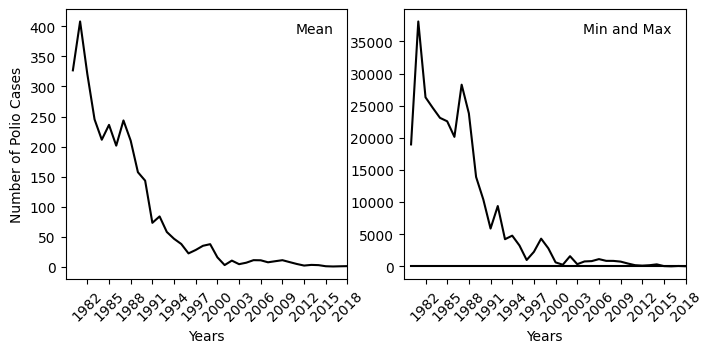

In [179]:
import numpy as np 

#--this is prelim work you will learn later
data = pd.read_csv("polio.csv")

#--remove name column 
data = data.iloc[:,1:]

#--revmoe source and html columns 
data = data.loc[ :, ~data.columns.isin(["source","URL"]) ] 

#--convert dashses to nans
def from_dash_to_nan(col):
    values = []
    for x in col:
        if x=="-":
            values.append(np.nan)
        else:
            try:
                values.append(int(x))
            except:
                values.append(np.nan)
    return values

for col in data:
    data[col] = from_dash_to_nan(data[col])

#--lets compute the mean, min, and max
mean  = data.mean()
min_  = data.min()
max_  = data.max() 

#--lets plot this information (to be learned later in class)
fig, axs = plt.subplots(1,2) #<-- create two panels 
axs[0].plot(mean, "k-") #<--plot 
axs[1].plot(min_, "k-") #<--plot 
axs[1].plot(max_, "k-") #<--plot 

#--we will need these to help us label our xticks
N     = len(mean)
years = data.columns 

#--set Xlabels
axs[0].set_xlabel("Years")
axs[1].set_xlabel("Years")

#--set ylabels
axs[0].set_ylabel("Number of Polio Cases")

#--set figure size
fig.set_size_inches(8,3.5)

ticks = axs[0].get_xticks()[::3]
axs[0].set_xticks(ticks)

axs[0].set_xticklabels(years[ticks], rotation=45)
axs[0].set_xlim( N , 0)
axs[0].text(0.95,0.95,s="Mean", ha="right",va="top",transform = axs[0].transAxes)

ticks = axs[1].get_xticks()[::3]
axs[1].set_xticks( ticks )

axs[1].set_xticklabels( years[ticks], rotation=45)
axs[1].set_xlim( N , 0)
axs[1].text(0.95,0.95,s="Min and Max", ha="right",va="top",transform = axs[1].transAxes)

plt.show()


<div class="callout note">
<b> Dispersion for continuous data: </b>

A common measure of dispersion for <u>amount and balance data</u> is the **standard deviation**.
The **variance** is the **standard deviation** squared and is computed as 

\begin{align}
    v(\mathcal{D}) &= (N-1)^{-1} \sum_{i=1}^{N} \left( d_{i} - \bar{d} \right)^{2} \\ 
\end{align}

When the number of datapoints is large (i.e. when $N$ is large) then  you can compute the variance as 

\begin{align}
    v(\mathcal{D}) \approx N^{-1} \sum_{i=1}^{N} \left( d_{i} - \bar{d} \right)^{2} 
\end{align}

*Intuition:* 
The variance could be understood by mapping each data point to a distance from the mean and then computing the average distance. In other words, we can apply the function $f(d) = \left( d - \bar{d} \right)^{2}$ to each data point $d_{i}$ and compute

\begin{align}
    v(\mathcal{D}) &= (N-1)^{-1} \sum_{i=1}^{N} f(d_{i}) \approx  \frac{\sum_{i=1}^{N} f(d_{i})}{N}
\end{align}

Our goal is characterize how spread out our datapoints are. 
The mean is a natural central tendancy and so the variance first measures distance from the mean or 

\begin{align}
    d_{i} - \bar{d}
\end{align}

However, it is not of interest to us whether the data point is smaller than the mean or larger.
If one data point is 4 units smaller than the mean and a second data point is 4 units larger than the mean then we want them to contirbute the same "distance". 
One way to draw an equivalence betwee nvalues smaller or larger than the mean is to square every distance. 

\begin{align}
    (d_{i} - \bar{d})^{2}
\end{align}

Squaring each $d_{i} - \bar{d}$ means that the variance will be non-negative.
Large values of the variance indicate large dispersion and small values of the variance indicate a small dispersion among your data points: they are all close to the mean.  

The variance has a problem. Suppose our experiment collects the length of dogs from nose to tail in the units centimeters (cm). Then the average is in units cm but the variance is in units $\text{cm}^2$.
To keep our summary of dispersion on the same scale, we can take the square root of the variance---this is the standard deviation.

\begin{align}
    s(\mathcal{D}) = \left[v(\mathcal{D})\right]^{1/2} &= \sqrt{(N-1)^{-1} \sum_{i=1}^{N} \left( d_{i} - \bar{d} \right)^{2} } 
\end{align}

</div>

Another common measure of dispersion is the **interquartile range**.
The interquartile range equals the 75th percentile - the 25th percentile.
Given a dataset $\mathcal{D} = (d_{1},d_{2},\cdots,d_{n})$, the Xth **percentile** is the data point $d_{i}$ such that X percent of the values are smaller than $d_{i}$ and $100-X$ percent of the data points are larger than $d_{i}$. 
Like the range, the author feels that the interquartile range should be accompanied by the 25th and 75th percentiles that were used to generate this summary. Not everyone agrees.


<div class="callout note">

<b>How do I find a percentile?</b>

Suppose you have collected $N$ data points $\mathcal{D} = (d_{1}, d_{2},\cdots, d_{N})$.
First, like when we computed the median, sort your data points from smallest to largest. 
$\mathcal{D} = (d_{(1)},d_{(2)},\cdots,d_{(N)}) $ where the parentheses denote the $x^{\text{th}}$ largest value. 
Next, we compute the percentile for each data point. Sometimes this is called a "fractional index".
In other words, we will compute the vector 

\begin{align}
    F = [d_{(1)},d_{(2)},\cdots,d_{(N)}]^{T} / N
\end{align}

Suppose we wish to return the $p^{\text{th}}$ percentile. 
Then we search F for the closest value to $p$. 
If $p$ happens to exist inside of $F$ then we return the corresponding value in the sorted $[d_{(1)},d_{(2)},\cdots,d_{(N)}]^{T}$. 

If, the more likely scenario, $p$ does not exist in $F$ then there exists one $f$ value thats smaller than $p$, called $f_{-}$ and one value thats larger than $p$ called $f_{+}$, and both values are closest to $p$. 
Numpy (in python) by default computes a line between the points $(f_{-}, d_{-})$ and $(f_{+}, d_{+})$ and returns the value one the line that meets $p$. 

There are many differnt styles for approximating percentiles. 

</div>


**Example: Spills of produced water by the Texas oil and gas industry from 2013 to 2022**
Records of gas and oil spilles recorded by the Texas Railroad Commission was collected by Peter Aldhous [link](https://github.com/InsideClimateNews/2023-10-tx-produced-water-spills/tree/main). 
Each observation in the dataset is an incident and includes the number of gallons of oil spilled during the incident. We can download this dataset into Python and compute the variance, standard deviation, and interquartile range using the numpy modeule.

In [180]:
#TL;DR for this part
import pandas as pd
d = pd.read_csv("https://raw.githubusercontent.com/InsideClimateNews/2023-10-tx-produced-water-spills/refs/heads/main/data/central_cleaned.csv")
amount_of_crude_oil = d["release_crude_oil_edit"].astype(float)
amount_of_crude_oil = amount_of_crude_oil[~np.isnan(amount_of_crude_oil)] #--Restrict to oil spill recorded
amount_of_crude_oil = amount_of_crude_oil[amount_of_crude_oil>0]          #--Restrict to oil spill

#--Exploratory Data Analysis piece (This is the important part)
import numpy as np

#--central tendancy
mean_crude_oil   = np.mean(amount_of_crude_oil)
median_crude_oil = np.median(amount_of_crude_oil)

#--dispersion
variance_crude_oil = np.var(amount_of_crude_oil)
std_dev_crude_oil  = np.std(amount_of_crude_oil)

#--The interquartile range plus percentiles
_25th_percentile_crude_oil = np.percentile(amount_of_crude_oil, 25)
_75th_percentile_crude_oil = np.percentile(amount_of_crude_oil, 75)
IQR = _75th_percentile_crude_oil - _25th_percentile_crude_oil

print("The mean and standard deviation of the Gallons of Crude oil spilled are")
print(mean_crude_oil)
print(std_dev_crude_oil)

print("The median and interquartile range (with 25,75th percnetiles) of the Gallons of Crude oil spilled are")
print(median_crude_oil)
print(IQR)
print(_25th_percentile_crude_oil)
print(_75th_percentile_crude_oil)

#--more interesting, galls spilled per company. 
def gallons(subset):
    amount_of_crude_oil = subset["release_crude_oil_edit"].astype(float)
    amount_of_crude_oil = amount_of_crude_oil[~np.isnan(amount_of_crude_oil)] #--Restrict to oil spill recorded
    amount_of_crude_oil = amount_of_crude_oil[amount_of_crude_oil>0]     
    
    if len(amount_of_crude_oil)>1:   
        #--central tendancy
        mean_crude_oil   = np.mean(amount_of_crude_oil)
        median_crude_oil = np.median(amount_of_crude_oil)
        
        #--dispersion
        variance_crude_oil = np.var(amount_of_crude_oil)
        std_dev_crude_oil  = np.std(amount_of_crude_oil)
        
        #--The interquartile range plus percentiles
        _25th_percentile_crude_oil = np.percentile(amount_of_crude_oil, 25)
        _75th_percentile_crude_oil = np.percentile(amount_of_crude_oil, 75)
        IQR = _75th_percentile_crude_oil - _25th_percentile_crude_oil
    
        return pd.Series({"mean":mean_crude_oil, "variance":variance_crude_oil})
    elif len(amount_of_crude_oil) == 1:
        return pd.Series({"mean":amount_of_crude_oil.values[0], "variance":0})
    else:
        return pd.Series({"mean":np.nan, "variance":np.nan})

oil_stats = d.groupby(["operator_edit"]).apply(gallons)
oil_stats = oil_stats.loc[~np.isnan(oil_stats["mean"]),:]
oil_stats

The mean and standard deviation of the Gallons of Crude oil spilled are
1779.2016927184468
7282.019132458342
The median and interquartile range (with 25,75th percnetiles) of the Gallons of Crude oil spilled are
630.0
1188.6
281.40000000000003
1470.0


/var/folders/gz/t2mqv3h97_bcfv3l8vcgf5rc0000gp/T/ipykernel_85586/3538710811.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  oil_stats = d.groupby(["operator_edit"]).apply(gallons)


,mean,variance
operator_edit,,
"12013 OIL TEXAS, LLC",840.000000,0.000000e+00
"1776 ENERGY OPERATOR, LLC",1722.000000,2.683044e+06
1776 ENERGY OPERATORS,641.900000,1.921215e+06
"1836 RESOURCES, LLC",126.000000,0.000000e+00
"2014 GS HOLDINGS OPERATING, LLC.",5460.000000,0.000000e+00
...,...,...
XOG OPERATING,56784.000000,0.000000e+00
XOG OPERATING LLC,252.000000,7.173600e+04
XTO Energy (ExxonMobil subsidiary),1150.493596,6.829910e+06


In [181]:
oil_stats = oil_stats.sort_values("mean", ascending=False)
oil_stats.iloc[:20]

,mean,variance
operator_edit,,
WHITE OAK OPERATING COMPANY LLC,61740.0,0.000000e+00
XOG OPERATING,56784.0,0.000000e+00
"BELLOWS, DEWEY OPER. CO., LTD",37464.0,0.000000e+00
"CYPRESS ENERGY PARTNERS-TX, LLC",26250.0,0.000000e+00
SUPERIOR DISPOSAL SERVICES LLC,23520.0,0.000000e+00
HARVEST MIDSTREAM,22680.0,0.000000e+00
T-C OIL COMPANY,21840.0,0.000000e+00
Enterprise Products,19684.0,7.650354e+08
CWR MANAGEMENT LLC,18900.0,0.000000e+00


## Implementing statistical ideas in the computer: Pandas

## Pandas 

The **pandas** module in Python is, by far, the most used set of tools for interacting with data, data points, and data frames. The documentation for Pandas is available here = [link](https://pandas.pydata.org/docs/). 
Pandas allows a structured way to import, organize, access, and compute with data frames.
These are the same data frames that were introduced earlier. 

But first, we need to discuss the fundemental object in pandas that precedes the Data Frame---the **Series**. 

### Series
A **Series** is (1) a list of items plus (2) an index, a list of string values that are associated with each item in (1).

The typical way to define a Series is by calling ```pd.Series``` and inputting a list and index. 
For example, the first two data points of out above coin flip experiment were tails and then heads.
Lets assign "tails" the value 0 and "heads" the value 1 to make this more numerically friendly. 

In [182]:
import pandas as pd                                     #<--Import pandas (only needed once)
coin_flips = pd.Series([0,1], index=["flip1", "flip2"]) #<--Create a Series
print(coin_flips)                                       # Print this out so we can see what this object looks like

flip1    0
flip2    1
dtype: int64


We see that a series object was created where all the values are integers.
This is a rule for Series, they cannot be "mixed" type such as character and integer or integer and floats (decimals values).   

The index for our series is displayed on the left side.
We can access items in a series using the index like this. 

In [183]:
coin_flips.get("flip1")

np.int64(0)

or like this 

In [184]:
coin_flips["flip1"]

np.int64(0)

Like most objects in Python, a series is a type of dictionary.
The "keys" of the dictionary are the index values and the "values" of the dictionary are the items in the list. 
In fact, we can build a series from a dictionary.

In [185]:
coin_flips = pd.Series({"flip1":0,"flip2":1})
coin_flips

flip1    0
flip2    1
dtype: int64

Finally, it should be noted that pandas Series objects can, for the most part, be treated the same as numpy arrays. 
Series support vectorized operations. 
That is, adding/multiplying/dividing/subtracting a constant $c$ applys to all items in the series.

In [186]:
coin_flips+2 #<--vectorized addition

flip1    2
flip2    3
dtype: int64

Adding/multiplying/dividing/subtracting two vectors is computed elementwise 

In [187]:
coin_flips + (2* coin_flips-1)

flip1   -1
flip2    2
dtype: int64

and applying any function to the series applies this function to each item in the series. 

In [188]:
import numpy as np
np.sqrt(np.exp(coin_flips+1))

flip1    1.648721
flip2    2.718282
dtype: float64

## Data Frames

In pandas, **data frames** are organized the same as our above definition for a data frame. 
Rows denote observations and each column corresponds to one piece of information about each outcome/observation.

To build a data frame in python from scratch, you can (1) define a dictionary such that the each key is a string that corresponds to a column name and each value is a list where the first item in the list corresponds to information about the first outcome (or observation), the second item in the list corresponds to information about the second observation, and so on. An example is helpful here. 

Lets build the above data frame of human judgment predictions of COVID-19. 
We need three columns: expert, cases, deaths. 
The expert column has the information (Yes, No, Yes, Yes, No).
The cases column has the information (145, 215, 524, 265, 35)	
and so on. 

In [189]:
import pandas as pd
human_judgment_predictions = {"expert"  :["Yes","No","Yes","Yes","No"]
                              , "cases" :[145  ,215 ,524  ,265  ,354]
                              , "deaths":[52   ,34  ,48   ,95   ,35]}
human_judgment_predictions_data_frame = pd.DataFrame(human_judgment_predictions) #<--This converts our dict to a pandas data frame 
print(human_judgment_predictions_data_frame)

  expert  cases  deaths
0    Yes    145      52
1     No    215      34
2    Yes    524      48
3    Yes    265      95
4     No    354      35


In many instances we will import a csv, excel, or similar type of tabular data into a python pandas data frame.
To load in a pandas data frame from a csv file, we can use the ```pd.read_csv```.
For an excel file we can use ```pd.read_excel```. 
There are many "read" options in pandas.

--- 
*Example Billion-Dollar Weather and Climate Disasters:*
US National Centers for Environmental Information maintains an inventory of the most costly such disasters in the US. 

To load in the data called ```"events-US-1980-2024.csv"``` that documents these disasters from 1980 to present, we can write

In [190]:
disasters = pd.read_csv("events-US-1980-2024.csv")
disasters

#--Not important for this lesson. (Lets replace the TBD in these cells with the value NAN)
import numpy as np
disasters = disasters.replace("TBD",np.nan)
disasters["Unadjusted Cost"] = disasters["Unadjusted Cost"].astype(float)

### Selecting columns

To select a column from a dataframe $D$, we call the dataframe and use brackets to call the column we want to select. Like this.

In [191]:
disasters["Disaster"]

0              Flooding
1      Tropical Cyclone
2               Drought
3                Freeze
4          Severe Storm
             ...       
395    Tropical Cyclone
396        Severe Storm
397    Tropical Cyclone
398    Tropical Cyclone
399    Tropical Cyclone
Name: Disaster, Length: 400, dtype: object

In [192]:
disasters[["Disaster","Name"]]

,Disaster,Name
0,Flooding,Southern Severe Storms and Flooding (April 1980)
1,Tropical Cyclone,Hurricane Allen (August 1980)
2,Drought,Central/Eastern Drought/Heat Wave (Summer-Fall...
3,Freeze,Florida Freeze (January 1981)
4,Severe Storm,"Severe Storms, Flash Floods, Hail, Tornadoes (..."
...,...,...
395,Tropical Cyclone,Hurricane Beryl (July 2024)
396,Severe Storm,Central and Eastern Tornado Outbreak and Sever...
397,Tropical Cyclone,Hurricane Debby (August 2024)
398,Tropical Cyclone,Hurricane Helene (September 2024)


### Selecting rows 

The first way to select rows is by *slicing*.
We can *slice* rows by providing a range of rows to select from beginning:end.
For example, if we want to select the 3rd, 4th, up to the 9th row, we can write

In [193]:
disasters[3:10]

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2070.6,572.0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1405.2,401.4,20
5,"Midwest/Southeast/Northeast Winter Storm, Cold...",Winter Storm,19820108,19820116,2211.1,662.0,85
6,Midwest/Plains/Southeast Tornadoes (April 1982),Severe Storm,19820402,19820404,1599.5,483.2,33
7,Severe Storms (June 1982),Severe Storm,19820531,19820610,1574.2,479.9,30
8,Gulf States Storms and Flooding (December 1982...,Flooding,19821201,19830115,4930.7,1536.1,45
9,Western Storms and Flooding (December 1982-Mar...,Flooding,19821213,19830331,4813.8,1499.6,50


More often than not, you will use the ```.loc``` attribute to select rows. 
You can select rows based on their index name

In [194]:
disasters.loc[4]

Name                 Severe Storms, Flash Floods, Hail, Tornadoes (...
Disaster                                                  Severe Storm
Begin Date                                                    19810505
End Date                                                      19810510
CPI-Adjusted Cost                                               1405.2
Unadjusted Cost                                                  401.4
Deaths                                                              20
Name: 4, dtype: object

and, even more important, you can select rows via *boolean indexing*.
Boolean indexing supplies the data frame with a list that has the same length as the number of rows of the data frame that contains the values True and False.
The rows corresponding to True values are returned. 

Creating boolean lists based on our data frame is easy.
For example, suppose we cant to identify (with True and False) the disasters that results in more than 20 deaths.
We can write the following expression 

In [195]:
disasters["Deaths"] > 20

0      False
1      False
2       True
3      False
4      False
       ...  
395     True
396    False
397    False
398     True
399     True
Name: Deaths, Length: 400, dtype: bool

This Boolean list can be used to select all the rows with more than 20 deaths like

In [196]:
disasters.loc[disasters["Deaths"] > 20]

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40480.8,10020.0,1260
5,"Midwest/Southeast/Northeast Winter Storm, Cold...",Winter Storm,19820108,19820116,2211.1,662.0,85
6,Midwest/Plains/Southeast Tornadoes (April 1982),Severe Storm,19820402,19820404,1599.5,483.2,33
7,Severe Storms (June 1982),Severe Storm,19820531,19820610,1574.2,479.9,30
8,Gulf States Storms and Flooding (December 1982...,Flooding,19821201,19830115,4930.7,1536.1,45
...,...,...,...,...,...,...,...
374,Southern/Midwestern Drought and Heatwave (Spri...,Drought,20230401,20230930,14786.7,14082.0,247
378,"Central, Southern, Northeastern Winter Storm a...",Winter Storm,20240114,20240118,1948.3,1910.0,41
395,Hurricane Beryl (July 2024),Tropical Cyclone,20240708,20240708,7219,7219.0,45
398,Hurricane Helene (September 2024),Tropical Cyclone,20240924,20240929,NaN,NaN,225


We can select both rows and columns using the ```.loc``` attribute as well. 
We can use the syntax ```df.loc[ <row selection>, <column selection>  ]```
For example, lets select rows with disasters with an unadjusted cost of more than 20000 billion and for columns we'll select the name and type of disaster. 

In [197]:
disasters.loc[disasters["Unadjusted Cost"]>20000 , ["Name","Disaster"]]

,Name,Disaster
26,U.S. Drought/Heat Wave (Summer 1988),Drought
44,Hurricane Andrew (August 1992),Tropical Cyclone
50,Midwest Flooding (Summer 1993),Flooding
115,Hurricane Ivan (September 2004),Tropical Cyclone
119,Hurricane Katrina (August 2005),Tropical Cyclone
145,Hurricane Ike (September 2008),Tropical Cyclone
190,Hurricane Sandy (October 2012),Tropical Cyclone
192,U.S. Drought/Heat Wave (2012),Drought
253,Hurricane Harvey (August 2017),Tropical Cyclone
254,Hurricane Irma (September 2017),Tropical Cyclone


### Adding new columns 
There are several different ways to add columns to a pandas data frame. 
The most straightforward way to add a column is to call the dataframe with a bracketed string and assign this the column values. 

For example, suppose we want to add a column to the above disasters data frame.
This new column is going to be the number of deaths minus the mean number of deaths as a result of the disaster. 

In [198]:
disasters.assign( Flood = lambda x: x["Disaster"].str.contains("Flood") )

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Flood
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2742.3,706.8,7,True
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2230.2,590.0,13,False
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40480.8,10020.0,1260,False
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2070.6,572.0,0,False
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1405.2,401.4,20,False
...,...,...,...,...,...,...,...,...
395,Hurricane Beryl (July 2024),Tropical Cyclone,20240708,20240708,7219,7219.0,45,False
396,Central and Eastern Tornado Outbreak and Sever...,Severe Storm,20240713,20240716,2435,2435.0,2,False
397,Hurricane Debby (August 2024),Tropical Cyclone,20240805,20240809,2476,2476.0,10,False
398,Hurricane Helene (September 2024),Tropical Cyclone,20240924,20240929,NaN,NaN,225,False


Its important to note that the ```assign``` function returns the entire dataframe. 
This means that if we want to add the column "Flood" to our original dataframe we need to write.

In [199]:
disasters = disasters.assign( Flood = lambda x: x["Disaster"].str.contains("Flood") )
disasters

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Flood
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2742.3,706.8,7,True
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2230.2,590.0,13,False
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40480.8,10020.0,1260,False
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2070.6,572.0,0,False
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1405.2,401.4,20,False
...,...,...,...,...,...,...,...,...
395,Hurricane Beryl (July 2024),Tropical Cyclone,20240708,20240708,7219,7219.0,45,False
396,Central and Eastern Tornado Outbreak and Sever...,Severe Storm,20240713,20240716,2435,2435.0,2,False
397,Hurricane Debby (August 2024),Tropical Cyclone,20240805,20240809,2476,2476.0,10,False
398,Hurricane Helene (September 2024),Tropical Cyclone,20240924,20240929,NaN,NaN,225,False


In the above we used a special attribute, ```str``` in pandas. 
We'll learn more about how to deal with strings in next week's lesson.

### Renaming columns 

To rename a column in our ```pandas``` dataframe, we can use the following snytax. 

```d = d.rename(columns = {"old name":"new name"})```

where we include inside the rename function a dictionary with "keys" that equal the old column names that we want to rename and "values" the new names associated with each old column. 

For example, if we wanted to change the column name "Begin Date" to "Begin" we could write 

In [200]:
disasters = disasters.rename(columns = {"Begin Date":"Begin"})

### List out all column names  

We can list out all columns names using the column attribute. 

In [201]:
disasters.columns

Index(['Name', 'Disaster', 'Begin', 'End Date', 'CPI-Adjusted Cost',
       'Unadjusted Cost', 'Deaths', 'Flood'],
      dtype='object')

Listing out all the columns gives the researcher a quick way to find out what pieces of information were collected for each observation in the dataset. 

### Applying a function over rows

For many tasks, you may want to apply a function to each observation. 
For example, for our disasters dataframe, we may want to remove the parenthetical from each of the Disaster names.  

In Pandas, to iterate over rows we have two options.

Option one is to use the ```iterrows()``` method. 

#### Using iterrows()

In [202]:
for index, row in disasters.iterrows():
    #<---------code to operate on each row>
    break #<-- not needed, only to illustrate what is returned from iterrows()

print("Index------")
print(index)

print("Row--------")
print(row)

Index------
0
Row--------
Name                 Southern Severe Storms and Flooding (April 1980)
Disaster                                                     Flooding
Begin                                                        19800410
End Date                                                     19800417
CPI-Adjusted Cost                                              2742.3
Unadjusted Cost                                                 706.8
Deaths                                                              7
Flood                                                            True
Name: 0, dtype: object


We see that when we call ```iterrows``` in a for loop, this method returns for each row in the dataframe, the index name and the row information. 
The row is a ```Series``` object. 
For example, we can access the Name of the disaster as 

In [203]:
row.Name

'Southern Severe Storms and Flooding (April 1980)'

To remove the parentetical from each name, we can use ```split``` to split the string on the symbol "(".
This will break our string into two pieces. We will need the first one (ie the name). 

In [204]:
row.Name.split("(")

['Southern Severe Storms and Flooding ', 'April 1980)']

In [205]:
name,parenthetical = row.Name.split("(")
name = name.strip() #<--this command removes any white space before or after a string 

Now that we arrived at our answer for one row, lets compute on every row and store it in a list.

In [206]:
names = [] #empty list 
for index, row in disasters.iterrows():
    name,parenthetical = row.Name.split("(")
    name = name.strip() 
    names.append(name)

Now that we have a list of all the names, lets add this to our dataframe.

In [207]:
disasters["name"] = names

In [208]:
disasters

,Name,Disaster,Begin,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Flood,name
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2742.3,706.8,7,True,Southern Severe Storms and Flooding
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2230.2,590.0,13,False,Hurricane Allen
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40480.8,10020.0,1260,False,Central/Eastern Drought/Heat Wave
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2070.6,572.0,0,False,Florida Freeze
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1405.2,401.4,20,False,"Severe Storms, Flash Floods, Hail, Tornadoes"
...,...,...,...,...,...,...,...,...,...
395,Hurricane Beryl (July 2024),Tropical Cyclone,20240708,20240708,7219,7219.0,45,False,Hurricane Beryl
396,Central and Eastern Tornado Outbreak and Sever...,Severe Storm,20240713,20240716,2435,2435.0,2,False,Central and Eastern Tornado Outbreak and Sever...
397,Hurricane Debby (August 2024),Tropical Cyclone,20240805,20240809,2476,2476.0,10,False,Hurricane Debby
398,Hurricane Helene (September 2024),Tropical Cyclone,20240924,20240929,NaN,NaN,225,False,Hurricane Helene


#### Using apply 

Another option is to define a function (```func```) that takes as input a row and then outputs a python object (anything really). 
Then, use the apply method to input each row in our dataframe to ```func``` and output the desired result. 

For example, we could have decided to write a function that inputs a row and returns a string representing the name of the disaters without parenthetical.

In [209]:
def from_fullname_2_name(row):
    name,parenthetical = row.Name.split("(")
    name = name.strip() 
    return name 
disasters.apply(from_fullname_2_name,1) #<-- note the option 1. This tells apply to use as input rows. The value 0 would use as input columns.

0                    Southern Severe Storms and Flooding
1                                        Hurricane Allen
2                      Central/Eastern Drought/Heat Wave
3                                         Florida Freeze
4           Severe Storms, Flash Floods, Hail, Tornadoes
                             ...                        
395                                      Hurricane Beryl
396    Central and Eastern Tornado Outbreak and Sever...
397                                      Hurricane Debby
398                                     Hurricane Helene
399                                     Hurricane Milton
Length: 400, dtype: object